<a href="https://colab.research.google.com/github/huaizhic/merge-sort-hybrid/blob/main/Algo_Proj_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part A

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from time import process_time, process_time_ns

np.set_printoptions(threshold=np.inf) # set the threshold for printing numpy array

def insertion_sort(list, key_comparisons):
    for i in range(1, len(list)):
        current = list[i]
        for j in range(i, 0, -1):
            key_comparisons[0] += 1
            if list[j] < list[j-1]:
                list[j] = list[j-1]
                list[j-1] = current
            else:
                break

    return list, key_comparisons


def merge_sort_hybrid(list, S, key_comparisons):
    length = len(list)

    if length <= S:   # base case
        return insertion_sort(list, key_comparisons)

    mid = length // 2

    left = merge_sort_hybrid(list[:mid], S, key_comparisons)[0]
    right = merge_sort_hybrid(list[mid:], S, key_comparisons)[0]

    return merge(left, right, key_comparisons)


def merge(left, right, key_comparisons):
    output = []
    i = j = 0

    while i < len(left) and j < len(right):
        key_comparisons[0] += 1
        if left[i] < right[j]:
            output.append(left[i])
            i += 1
        else:
            output.append(right[j])
            j += 1

    output.extend(left[i:])
    output.extend(right[j:])

    return output, key_comparisons

def main():
    unsorted = [99, 0, 5, 20, 123, 0, -1, 72, 21, 22, 13, 8, 7, 67, 29, 1, 2, 4]
    S = 5
    comparisons = merge_sort_hybrid(unsorted, S,[0])
    print(unsorted)
    print(comparisons)

    # unsorted = [3, 9, 2, 1]
    """ unsorted = [9, 3, 2, 1, 0]
    S = 3
    comparisons = merge_sort(unsorted,[0])
    print(unsorted)
    print(comparisons) """

main()

[99, 0, 5, 20, 123, 0, -1, 72, 21, 22, 13, 8, 7, 67, 29, 1, 2, 4]
([-1, 0, 0, 1, 2, 4, 5, 7, 8, 13, 20, 21, 22, 29, 67, 72, 99, 123], [58])


## Part B

In [ ]:

from numpy import random

def rng():
    inputs = []
    inputs.append(random.randint(1000, size=1000))
    for i in range(1, 5):
        size = 1000 * pow(10, i)
        inputs.append(random.randint(size, size=int(size/2)))
        inputs.append(random.randint(size, size=size))
    # input1000 = random.randint(100, size=(1000))
    # input10000 = random.randint(100, size=(10000))
    # input100000 = random.randint(100, size=(100000))
    # input1000000 = random.randint(100, size=(1000000))
    # input10000000 = random.randint(100, size=(10000000))

    # return [input1000, input10000, input100000, input1000000, input10000000]

    return inputs

inputs = rng()
for i in inputs:
    print(len(i))

1000
5000
10000
50000
100000
500000
1000000
5000000
10000000


In [ ]:
merge_sort_hybrid(rng()[0], 5, [0])
print(rng()[0])

[648 498 751 160 729 208 600 273 920 795 502 661  83 266 361 291 231 429
 957 175 116 590 808 227 963  61 349 575 185 291 626 392 219 209 685 567
  74 720 637 441 697 188 694 338 543  46 381  75 497 553   4 177 203 674
 313 524 746 962 618 888 397 651 706 419 705 840 796 900 531 372 750 432
 623 842  18 793 603 813 608 158 841 625 583 276 418 328  52 976  52  70
 886 825 342 380 620 411 973 237 516 606 118 563 516 121 333 988 276 321
 539 377  46  12 280 745 557 757 520 755 736 632 386 445 941 443  13 726
 241 609 874 130 841 577  90 345 191 907 547 551 157 406 291 303 332 741
 206 700 640 437 172 243 700 107 830 900  23 875 626 386 325 371 883 913
 819 159 137 450 101 861 912 347 477 154 496 267 838 997 963 303 136 436
 471 574 100 572 920 802 968 258 913 837 613 929 187 663  97 853 422 456
 348 530  35   0 954 602 108 377 775 783 618 517 799  64 874 250 480 149
 635 490 430 768 875 192 901 184 750 548 790  48 186 137 898   1 947  69
 666 337  30  84 637 560 890 627 150 784 180 272 88

# Part C

Empirical Analysis

i)

In [ ]:
inputList = rng()
inputSize = [len(l) for l in inputList]
keyComparisons = []
sortedList = []
cpuTime = []
for input in inputList:
    print(len(input))
    start = process_time()
    sortResult = merge_sort_hybrid(deepcopy(input), 3, [0])
    stop = process_time()
    cpuTime.append(stop-start)
    # print("Sorted:")
    # print(np.array(sortResult[0]))
    # print("Key Comparisons:", sortResult[1])
    sortedList.append(sortResult[0])
    keyComparisons.append(sortResult[1][0])

NameError: ignored

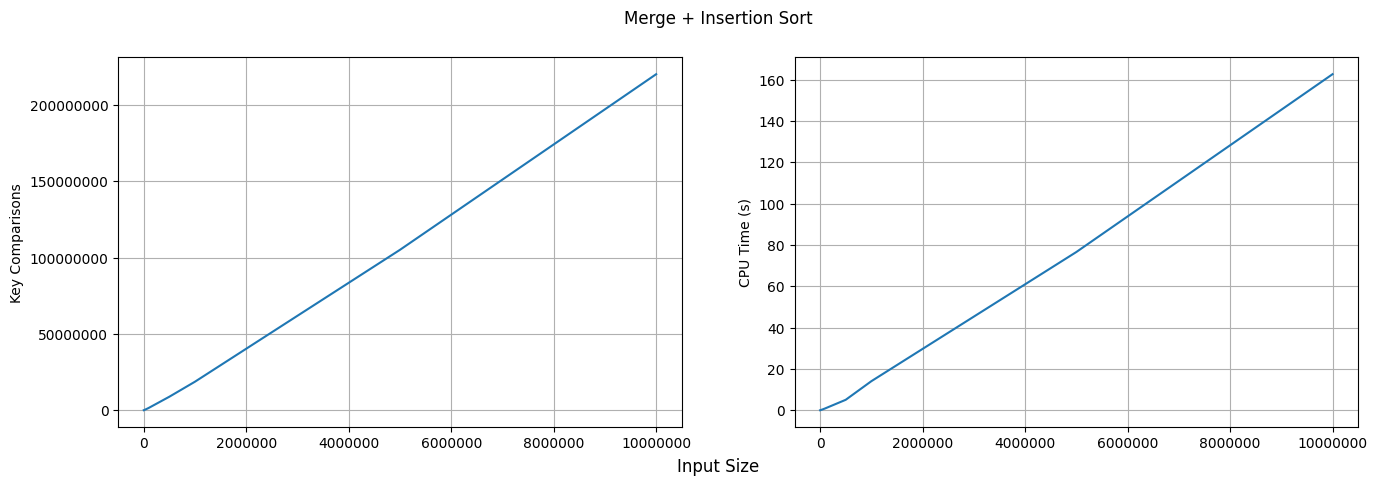

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,4.8))

fig.suptitle("Merge + Insertion Sort")
fig.supxlabel("Input Size")
ax1.plot(inputSize, keyComparisons)
ax1.ticklabel_format(style="plain")
ax1.grid()
ax1.set_ylabel("Key Comparisons")
ax2.plot(inputSize, cpuTime)
ax2.ticklabel_format(style="plain")
ax2.grid()
ax2.set_ylabel("CPU Time (s)")

plt.show()

In [ ]:
print(keyComparisons)
print(cpuTime)

[8695, 55212, 120461, 718112, 1536394, 8836034, 18675318, 105052035, 220099115]
[0.006109890000004725, 0.030040443000018513, 0.06341474900000321, 1.9939465130000258, 1.3389022810000029, 7.289285399999983, 13.71584881199999, 72.37031787199999, 155.70659540999998]


ii)

In [ ]:
arr = random.randint(100000, size=100000)
# print(arr)
result = merge_sort_hybrid(deepcopy(arr), 1, [0])
print(result[1][0])
result = merge_sort_hybrid(deepcopy(arr), 5, [0])
print(result[1][0])

1536615
1536919


In [ ]:
# inputList = rng()
Svalue = [i for i in range(1, 101)]
print(Svalue)
keyComp = []
cpu_Time = []
# print(np.array(inputList[0]))
size = 100000
for S in Svalue:
    input = random.randint(100000, size=size)
    # print(input)
    start = process_time()
    sortResult = merge_sort_hybrid(input, S, [0])
    stop = process_time()
    cpu_Time.append(stop-start)
    keyComp.append(sortResult[1][0])

print(keyComp)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[1536104, 1536365, 1536478, 1536671, 1536877, 1554912, 1557741, 1557880, 1557998, 1558487, 1558166, 1618927, 1639125, 1640593, 1639819, 1638962, 1639984, 1640448, 1639414, 1638251, 1639865, 1640401, 1639377, 1763829, 1861651, 1863866, 1861263, 1861716, 1863083, 1861167, 1859831, 1861836, 1863551, 1861469, 1861804, 1863715, 1861912, 1862824, 1860660, 1860943, 1863346, 1860589, 1860978, 1861617, 1862757, 1860672, 1862449, 1946907, 2380546, 2383102, 2386953, 2383013, 2385708, 2380342, 2383030, 2380259, 2378439, 2385435, 2378962, 2380296, 2380981, 2380387, 2382351, 2377029, 2385135, 2378218, 2383208, 238

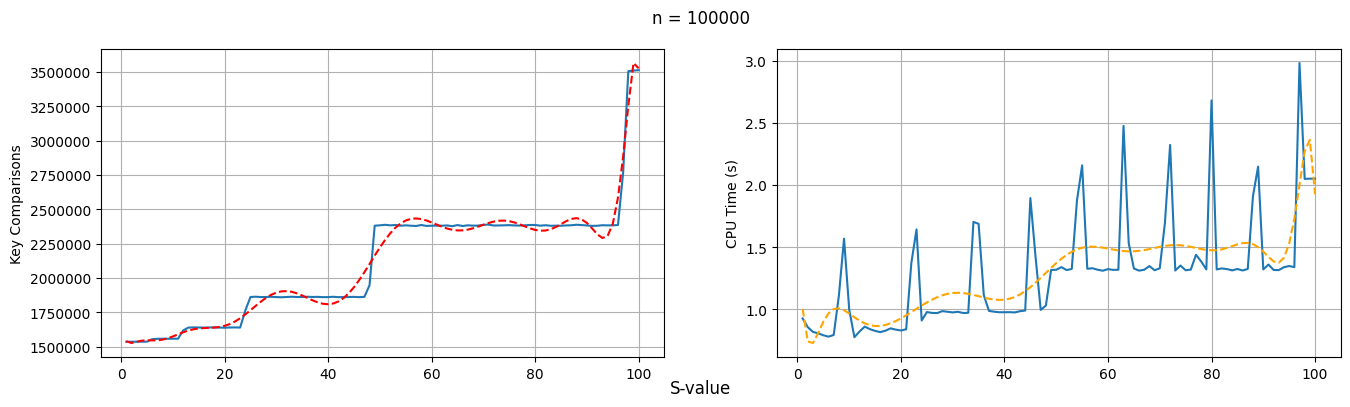

In [ ]:
# plotting trendline of the respective graphs
d = 15
z1 = np.polyfit(Svalue, keyComp, d)
p1 = np.poly1d(z1)
z2 = np.polyfit(Svalue, cpu_Time, d)
p2 = np.poly1d(z2)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,4))

fig.suptitle("n = " + str(size))
fig.supxlabel("S-value")
ax1.plot(Svalue, keyComp)
ax1.plot(Svalue, p1(Svalue), color="red", linestyle="--")
ax1.grid()
ax1.ticklabel_format(style="plain")
ax1.set_ylabel("Key Comparisons")
ax2.plot(Svalue, cpu_Time)
ax2.plot(Svalue, p2(Svalue), color="orange", linestyle="--")
ax2.set_ylabel("CPU Time (s)")
# ax2.set_xticks(Svalue)
ax2.grid()
# ax3.plot(Svalue[20:30], keyComp[20:30])
# ax3.grid()
# ax3.ticklabel_format(style="plain")
# ax3.set_ylabel("Key Comparisons")
# ax4.plot(Svalue[20:30], cpu_Time[20:30])
# ax4.set_ylabel("CPU Time (s)")
# ax4.grid()

plt.show()

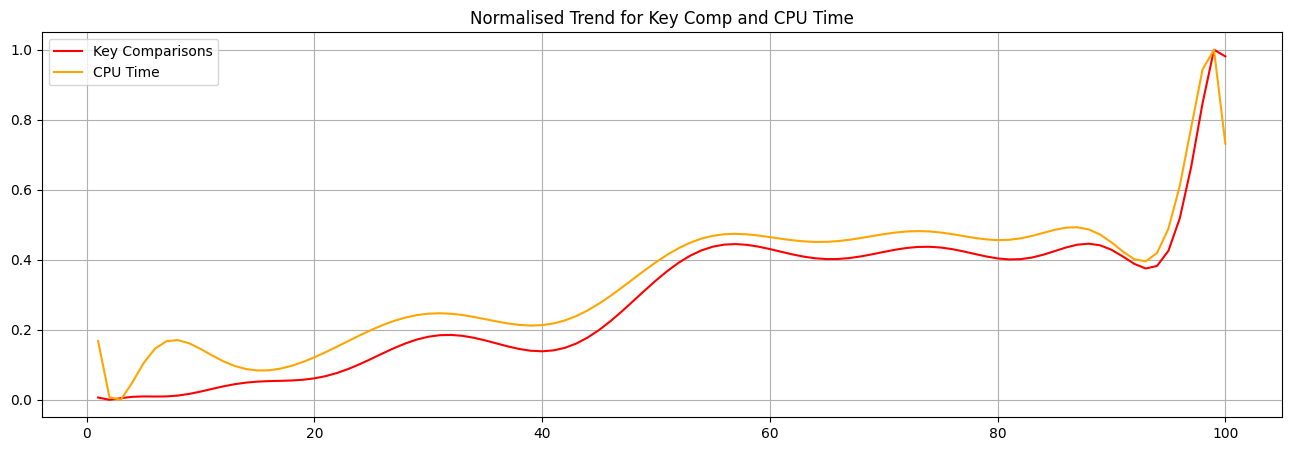

Correlation coefficient: 0.97959


In [ ]:
s1 = (p1(Svalue) - np.min(p1(Svalue))) / (np.max(p1(Svalue)) - np.min(p1(Svalue)))
s2 = (p2(Svalue) - np.min(p2(Svalue))) / (np.max(p2(Svalue)) - np.min(p2(Svalue)))

plt.figure(figsize=(16,5))
plt.title("Normalised Trend for Key Comp and CPU Time")
plt.plot(Svalue, s1, color="red", label="Key Comparisons")
plt.plot(Svalue, s2, color="orange", label="CPU Time")
plt.grid()
plt.legend()
plt.show()

corr_coef = np.corrcoef(s1, s2)
print("Correlation coefficient:", round(corr_coef[0][1], 5))

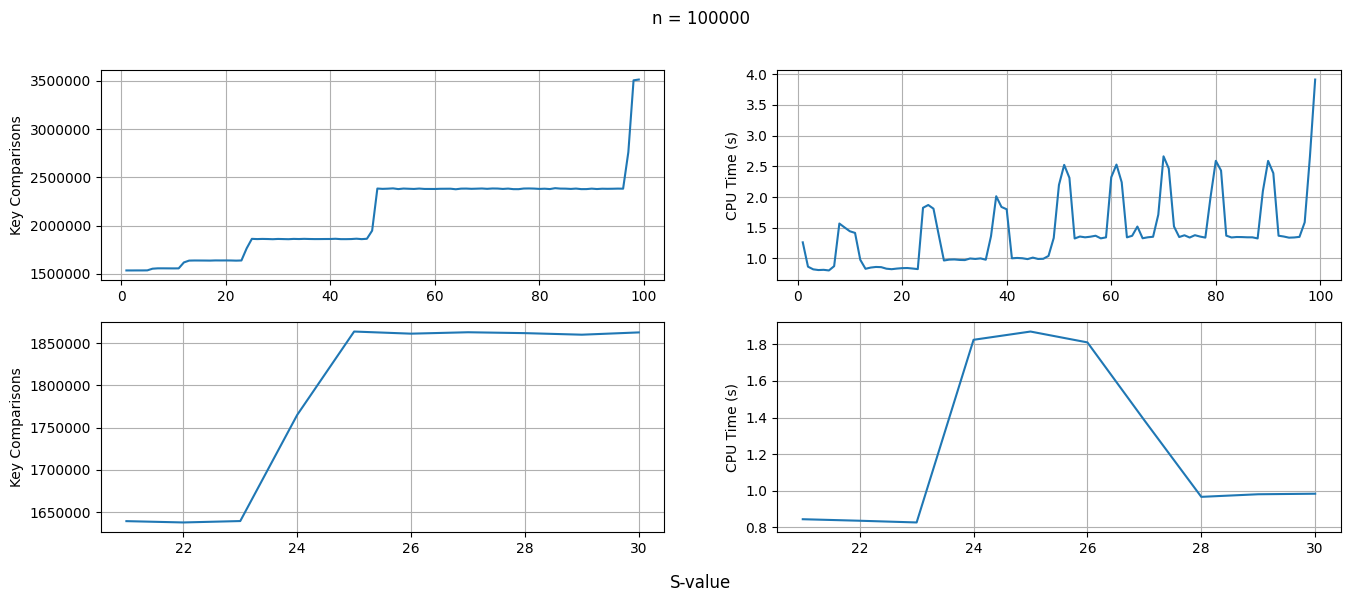

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16,6))

fig.suptitle("n = 100000")
fig.supxlabel("S-value")
ax1.plot(Svalue, keyComp)
ax1.grid()
ax1.ticklabel_format(style="plain")
ax1.set_ylabel("Key Comparisons")
ax2.plot(Svalue, cpu_Time)
ax2.set_ylabel("CPU Time (s)")
ax2.grid()
ax3.plot(Svalue[20:30], keyComp[20:30])
ax3.grid()
ax3.ticklabel_format(style="plain")
ax3.set_ylabel("Key Comparisons")
ax4.plot(Svalue[20:30], cpu_Time[20:30])
ax4.set_ylabel("CPU Time (s)")
ax4.grid()

plt.show()

In [ ]:
print(cpu_Time[13:15])
print(keyComp[13:15])

[0.11688283299997693, 0.07894784500001606]
[126912, 126967]


iii)

In [ ]:
print(random.randint(10, size=10))

[7 8 8 0 4 4 7 1 7 0]


## Theoretical Analysis

The main array to be sorted will be split into (N/S) sub-arrays of size S (the cutoff).

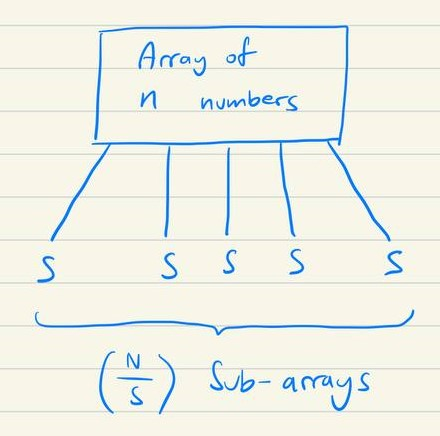

## Insertion Sort

Since each sub-array has a size of S, insertion sort will be used. Best case time complexity of insertion sort for each subarray is O(S), for the whole array it would be (N/S)*S, = O(N).

For Average and Worst case, sorting each subarray would be O(S^2), for the whole array = O(NS)

## Merge Sort

Suppose we have to do i iterations in merge sort to merge the sorted parts:
(2^i) * S = N => (2^i) = N/S => i*(log(2)) = log(N/S) => i = log(N/S)
Therefore, Time required to merge = O(N*log(N/S))




## Best / Worst / Average Cases

**When will best case occur:**
Consider an array which is already sorted. so, the time complexity of sorting all the sub-arrays using insertion sort will be O(S), where S is the size of the given input array.
Therefore, the total time complexity of the combined algorithm in best case is:
Best Case: N+N*log(N/S)

**When will worst case occur:**
As discussed earlier the time complexity of sorting all the sub-arrays using insertion sort in worst case will be O(NS), where N is the size of the given input array.
Therefore, the total time complexity of the combined algorithm in worst case is:
Worst Case: NS + N*log(N/S)

Best case: O(n + nlog(n/s))

Worst case: O(nS + nlog(n/s))

Average case: O(nS + nlog(n/s))

## C(i) Graphical Representation

Best case:

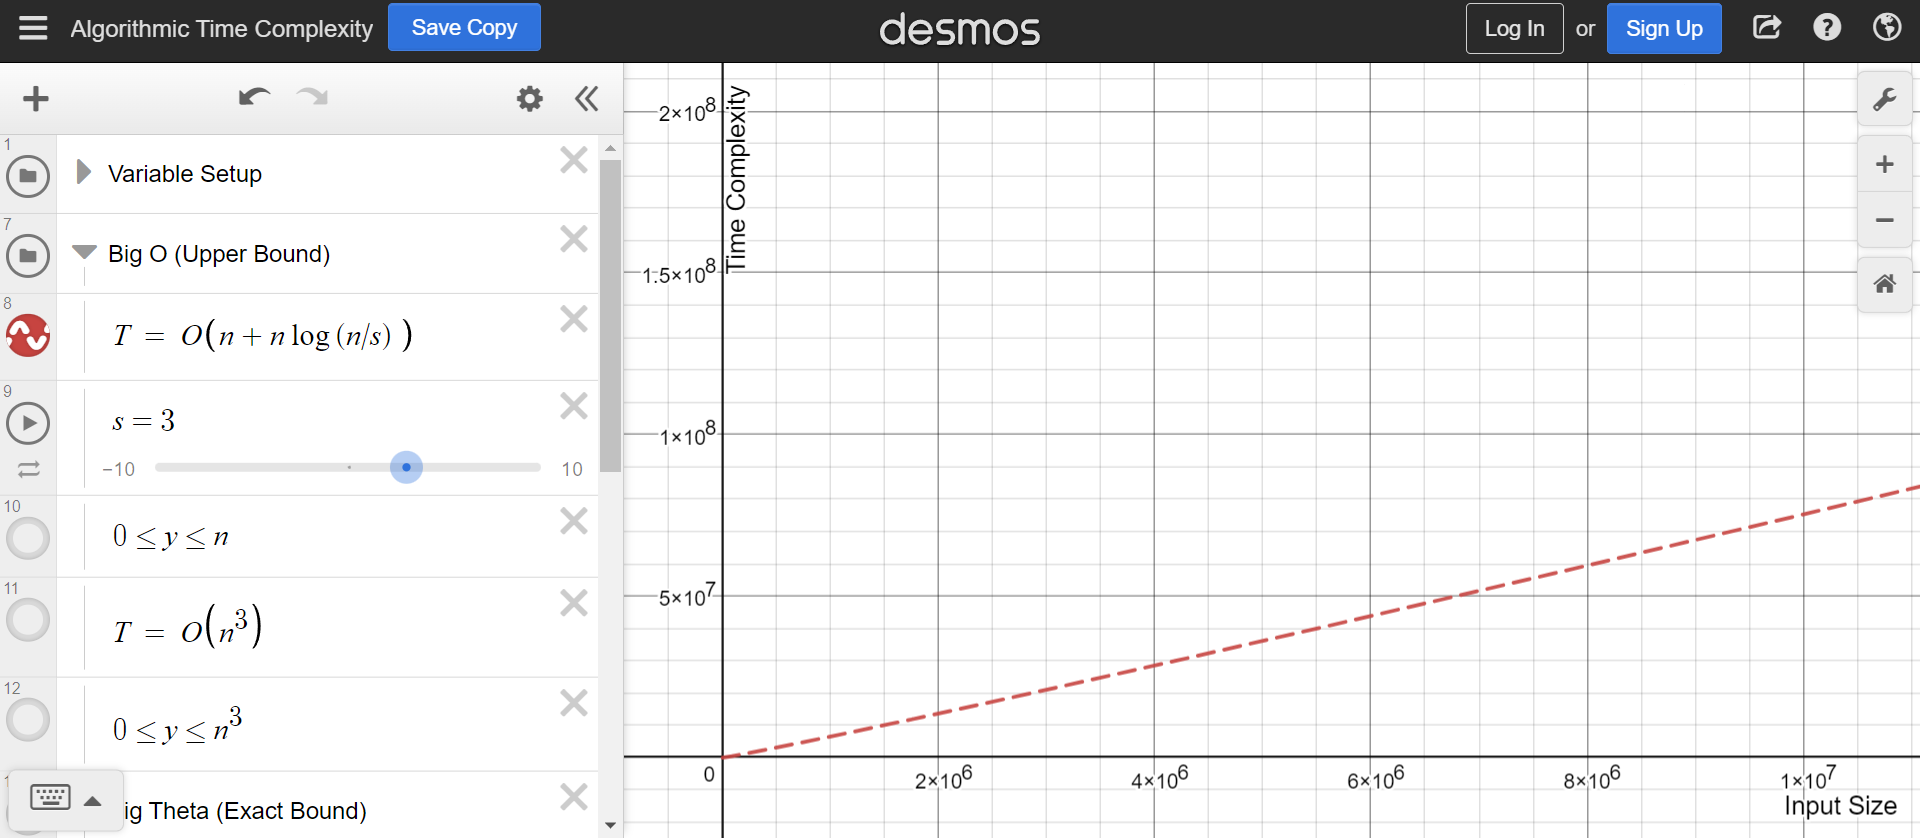



Worst/average case:

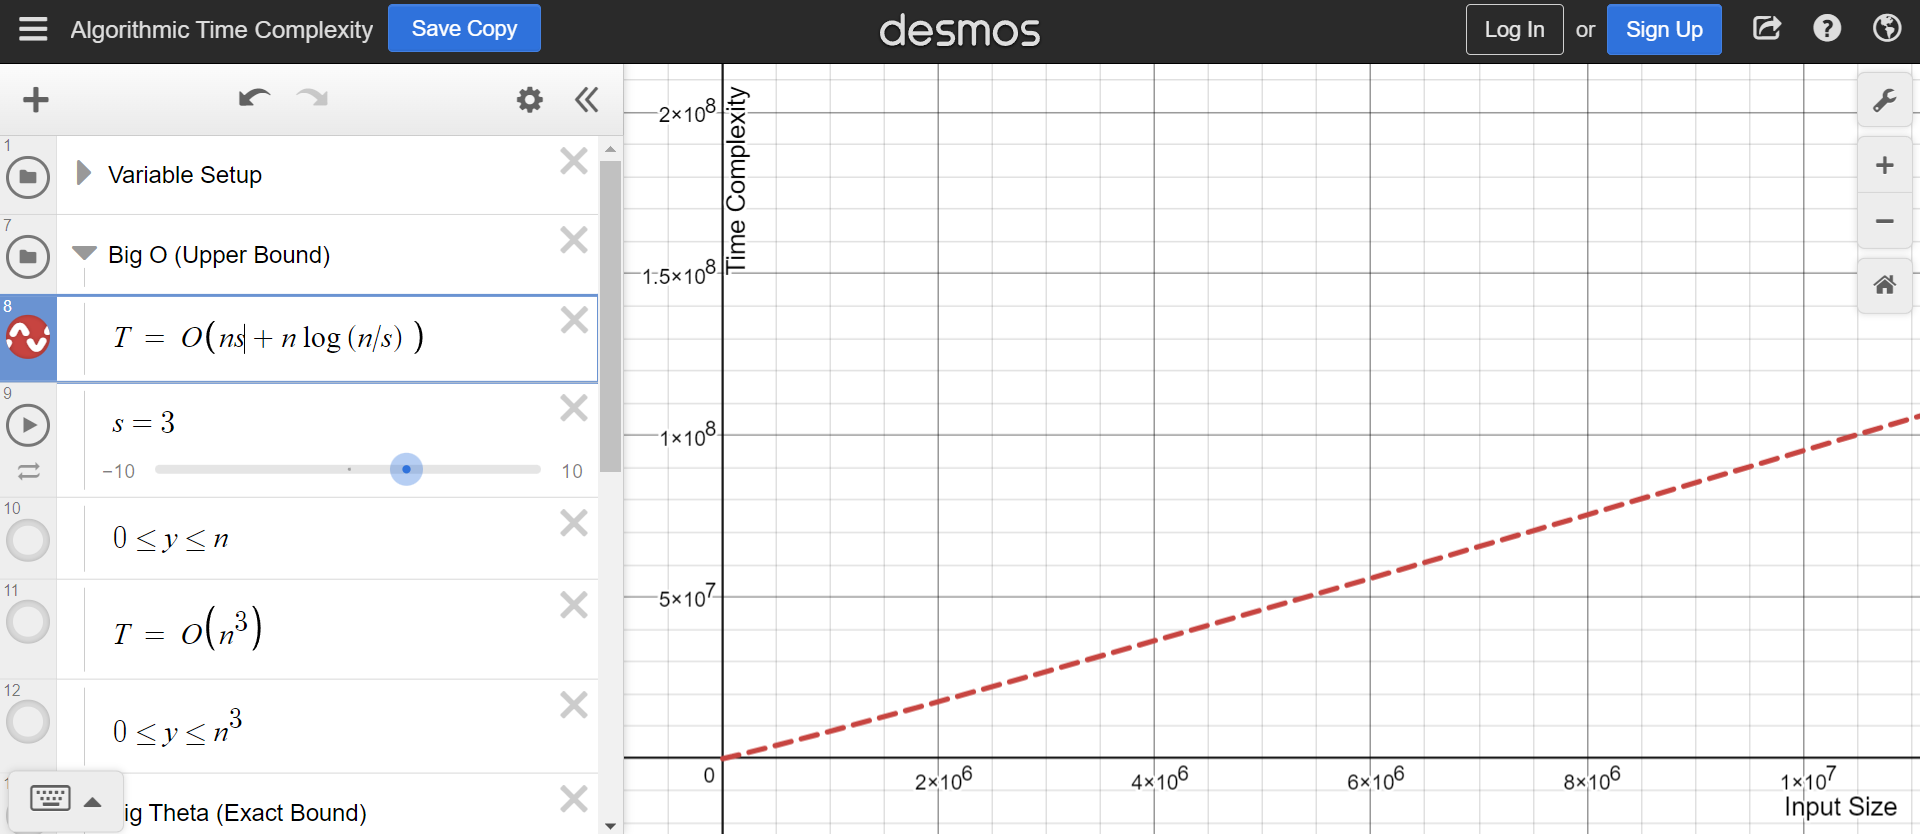

## C(ii) Theoretical Analysis
As S increases
more of insertion sort will be favoured over the merge sort in the hybrid algorithm. Thus, as S increases, the data will transition from merge sort to insertion sort in terms of key comparisons/time taken. Thus when increasing S, we expect the time complexity of hybrid sort to closely resemble that of insertion sort.

Insertion sort beats merge sort in terms of number of key comparisons and CPU time when the array size is small but is more inefficient when dealing with larger arrays.

Thus for the fixed array size but with increasing S, CPU time/key comps should increase at a rate that is similar to the time complexity of insertion sort.


## C(ii) Graphical Representation

For the best case, as S increases, we expect the time taken/no. of key comparisons to gradually decrease as insertion sort (O(N)) has a more efficient time complexity than merge sort (O(nlgn)).

For the avg/worst case, as S increases, we expect the time taken/no. of key comparisons to sharply increase as insertion sort (O(N^2)) has a much less efficient time complexity than merge sort (O(nlgn)).

##C(iii)
Plot graph comparing merge sort and insertion sort to see at which point (S-value) would be the best (where they intersect)


need number of inputs and either key comparison or cpu time, use average time complexity?

In [ ]:
def merge_sort(list, key_comparisons):
    length = len(list)

    if length == 1:   # base case
        return list, key_comparisons

    mid = length // 2

    left = merge_sort(list[:mid], key_comparisons)[0]
    right = merge_sort(list[mid:], key_comparisons)[0]

    return merge1(left, right, key_comparisons)

def merge1(left, right, key_comparisons):
    output = []
    i = j = 0

    while i < len(left) and j < len(right):
        key_comparisons[0] += 1
        if left[i] < right[j]:
            output.append(left[i])
            i += 1
        else:
            output.append(right[j])
            j += 1

    output.extend(left[i:])
    output.extend(right[j:])

    return output, key_comparisons

def main():
    unsorted = [99, 0, 5, 20, 123, 0, -1, 72, 21, 22, 13, 8, 7, 67, 29, 1, 2, 4]
    S = 5
    comparisons = merge_sort(unsorted,[0])
    print(unsorted)
    print(comparisons)
    print(comparisons[1][0])

    # unsorted = [3, 9, 2, 1]
    """ unsorted = [9, 3, 2, 1, 0]
    S = 3
    comparisons = merge_sort(unsorted,[0])
    print(unsorted)
    print(comparisons) """


main()

[99, 0, 5, 20, 123, 0, -1, 72, 21, 22, 13, 8, 7, 67, 29, 1, 2, 4]
([-1, 0, 0, 1, 2, 4, 5, 7, 8, 13, 20, 21, 22, 29, 67, 72, 99, 123], [52])
52


In [ ]:
keycomp = []
# sortedlist = []
cpu_time = []
avgCPU = []
avgKey = []
for i in range(1, 51):
    print(i, end=', ')
    for j in range(100000):
        input = random.randint(i, size=i)
        start = process_time_ns()
        sortResult0 = merge_sort(input, [0])
        stop = process_time_ns()
        cpu_time.append(stop-start)
        # sortedlist.append(sortResult0[0])
        keycomp.append(sortResult0[1][0])
    avgCPU.append(np.average(np.array(cpu_time)))
    avgKey.append(np.average(np.array(keycomp)))
    keycomp = []
    cpu_time = []
    if i % 10 == 0: print()

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 
21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 
31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 


In [ ]:
keycomp = []
# sortedlist = []
cpu_time = []
avgCPU1 = []
avgKey1 = []
for i in range(1, 51):
    print(i, end=', ')
    for j in range(50000):
        input = random.randint(i, size=i)
        start = process_time_ns()
        sortResult0 = insertion_sort(input, [0])
        stop = process_time_ns()
        cpu_time.append(stop-start)
        # sortedlist.append(sortResult0[0])
        keycomp.append(sortResult0[1][0])
    avgCPU1.append(np.average(np.array(cpu_time)))
    avgKey1.append(np.average(np.array(keycomp)))
    keycomp = []
    cpu_time = []
    if i % 10 == 0: print()

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 
21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 
31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 


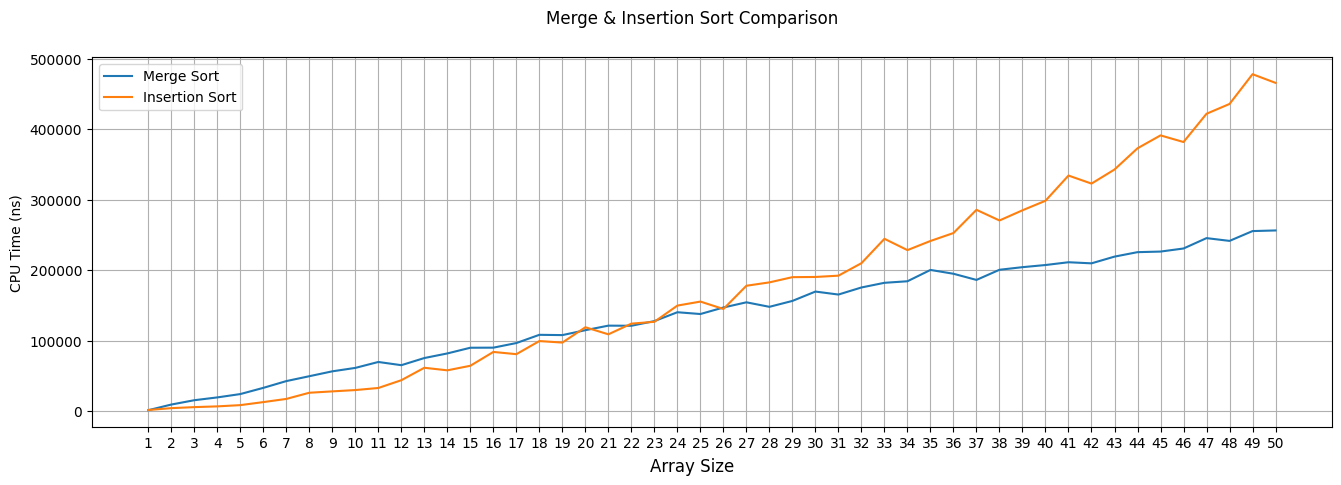

In [ ]:
sval = np.arange(1,51)

fig, ax1 = plt.subplots(1, 1, figsize=(16, 4.8))

fig.supxlabel("Array Size")
fig.suptitle("Merge & Insertion Sort Comparison")
ax1.plot(sval, avgCPU, label="Merge Sort")
ax1.plot(sval, avgCPU1, label="Insertion Sort")
ax1.set_ylabel("CPU Time (ns)")
ax1.set_xticks(sval)
ax1.legend()
ax1.grid()
# ax2.plot(sval, avgCPU, label="Merge Sort")
# ax2.plot(sval, avgCPU1, label="Insertion Sort")
# ax2.set_ylabel("CPU Time (ns)")
# ax2.ticklabel_format(style="plain")
# ax2.set_xticks(sval)
# ax2.legend()
# ax2.grid()
# plt.show()

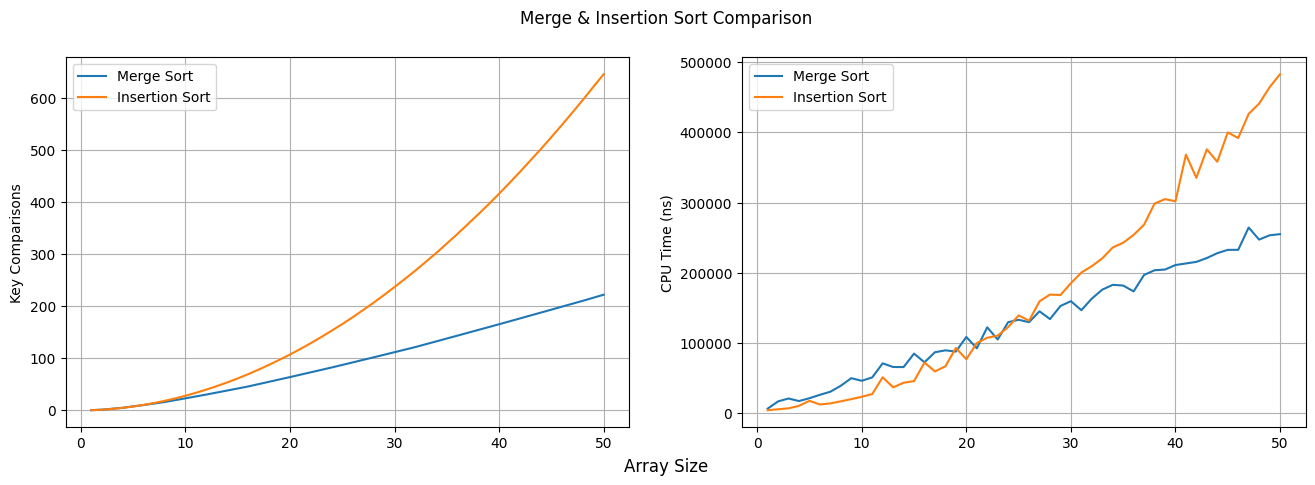

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4.8))

fig.supxlabel("Array Size")
fig.suptitle("Merge & Insertion Sort Comparison")
ax1.plot([i for i in range(1, 51)], avgKey, label="Merge Sort")
ax1.plot([i for i in range(1, 51)], avgKey1, label="Insertion Sort")
ax1.set_ylabel("Key Comparisons")
ax1.set_xticks()
ax1.legend()
ax1.grid()
ax2.plot([i for i in range(1, 51)], avgCPU, label="Merge Sort")
ax2.plot([i for i in range(1, 51)], avgCPU1, label="Insertion Sort")
ax2.set_ylabel("CPU Time (ns)")
ax2.ticklabel_format(style="plain")
ax2.set_xticks()
ax2.legend()
ax2.grid()
plt.show()

Based on the intersection between the two line graphs, the optimal S value would be 20.

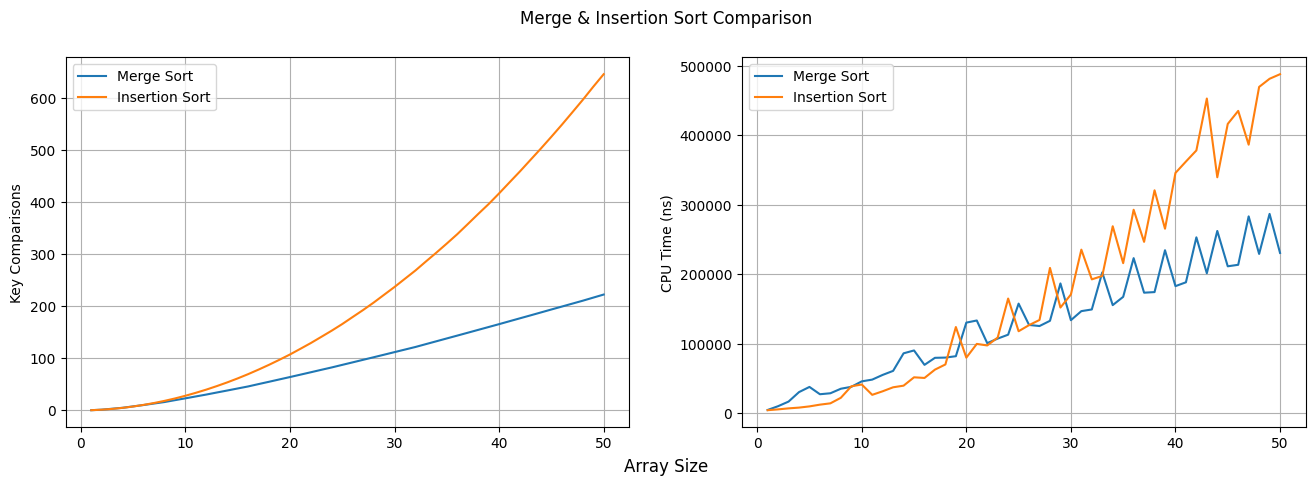

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4.8))

fig.supxlabel("Array Size")
fig.suptitle("Merge & Insertion Sort Comparison")
ax1.plot([i for i in range(1, 51)], avgKey, label="Merge Sort")
ax1.plot([i for i in range(1, 51)], avgKey1, label="Insertion Sort")
ax1.set_ylabel("Key Comparisons")
ax1.legend()
ax1.grid()
ax2.plot([i for i in range(1, 51)], avgCPU, label="Merge Sort")
ax2.plot([i for i in range(1, 51)], avgCPU1, label="Insertion Sort")
ax2.set_ylabel("CPU Time (ns)")
ax2.ticklabel_format(style="plain")
ax2.legend()
ax2.grid()
plt.show()

## Part D

In [ ]:
input = random.randint(1000, size=1000)

Merge Sort Time: 152078533212 ns
Hybrid Sort Time: 149897225659 ns


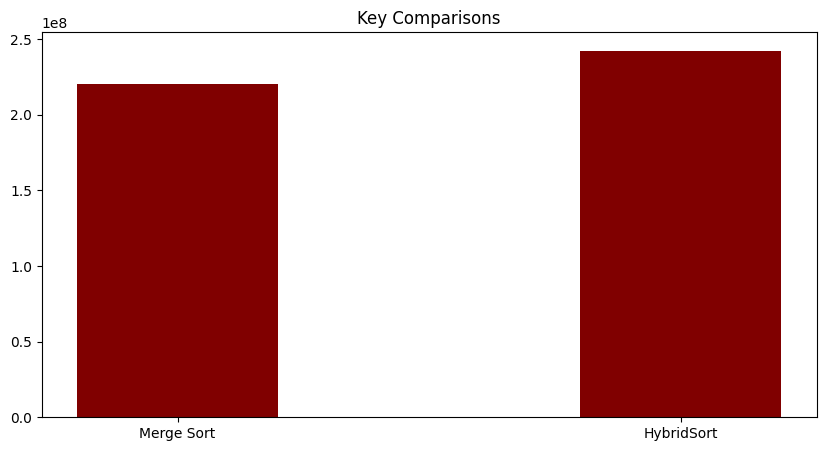

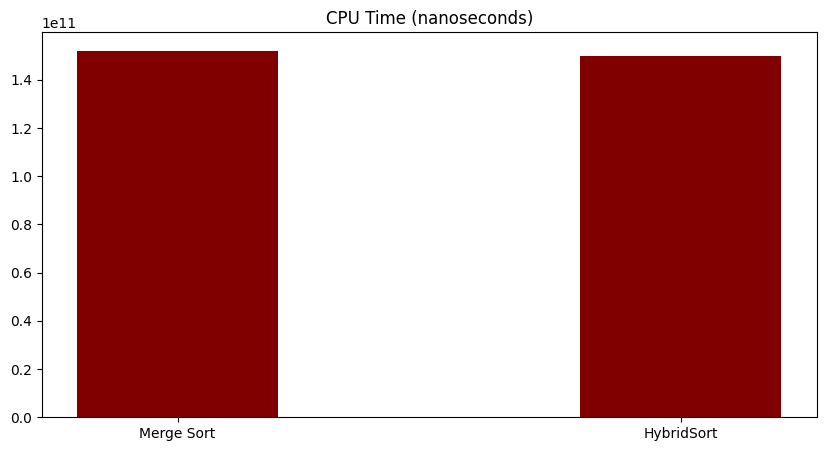

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from time import process_time, process_time_ns
from numpy import random

# unsorted = [99, 0, 5, 20, 123, 0, -1, 72, 21, 22, 13, 8, 7, 67, 29, 1, 2, 4]
# input = random.randint(1000, size=1000)
# print(input)
merge_start = process_time_ns()
comparisons = merge_sort(input,[0])
merge_stop = process_time_ns()
# print(merge_stop,merge_start)
merge_time = merge_stop - merge_start
print("Merge Sort Time:", merge_time, "ns")

S = 24
hybrid_start = process_time_ns()
sortResult = merge_sort_hybrid(input, S, [0])
hybrid_stop = process_time_ns()
hybrid_time = hybrid_stop - hybrid_start
print("Hybrid Sort Time:", hybrid_time, "ns")

# creating the dataset
data = {'Merge Sort':comparisons[1][0], 'HybridSort':sortResult[1][0]}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
		width = 0.4)

plt.xlabel("")
plt.ylabel("")
plt.title("Key Comparisons")
plt.show()




# creating the dataset
data = {'Merge Sort':merge_time, 'HybridSort':hybrid_time}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
		width = 0.4)

plt.xlabel("")
plt.ylabel("")
plt.title("CPU Time (nanoseconds)")
plt.show()


Merge Sort Time: 146525882682 ns
Hybrid Sort Time: 140940382132 ns


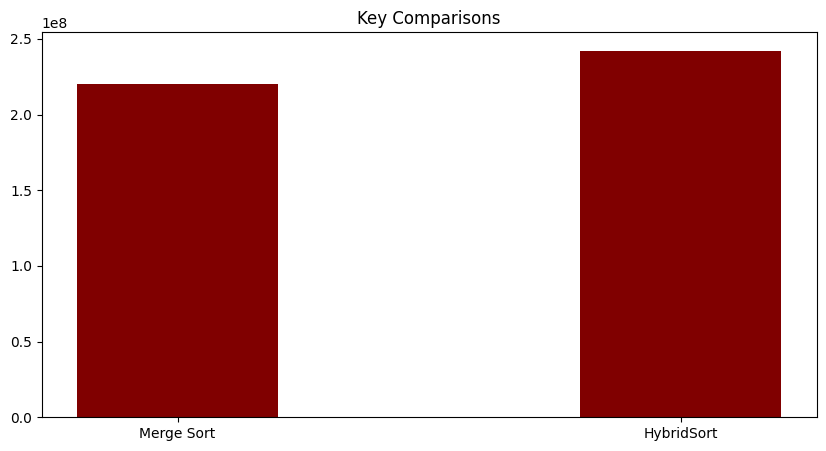

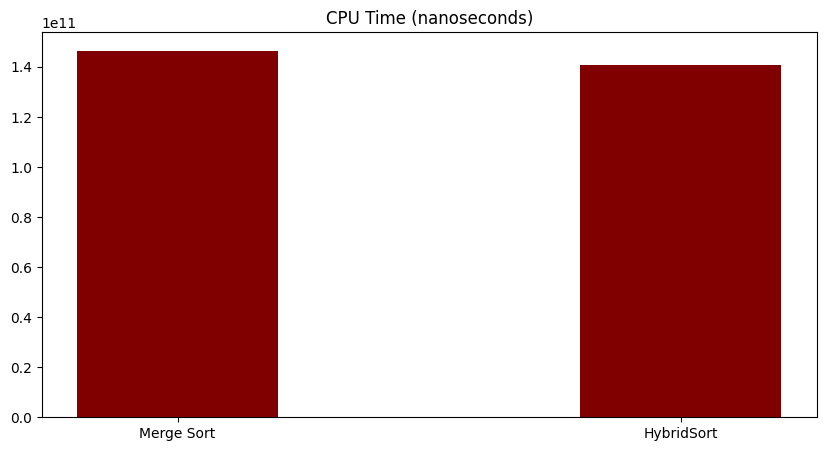

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from time import process_time, process_time_ns

# unsorted = [99, 0, 5, 20, 123, 0, -1, 72, 21, 22, 13, 8, 7, 67, 29, 1, 2, 4]
input = random.randint(1000, size=10000000)
# print(input)
merge_start = process_time_ns()
comparisons = merge_sort(input,[0])
merge_stop = process_time_ns()
# print(merge_stop,merge_start)
merge_time = merge_stop - merge_start
print("Merge Sort Time:", merge_time, "ns")

S = 23
hybrid_start = process_time_ns()
sortResult = merge_sort_hybrid(input, S, [0])
hybrid_stop = process_time_ns()
hybrid_time = hybrid_stop - hybrid_start
print("Hybrid Sort Time:", hybrid_time, "ns")

# creating the dataset
data = {'Merge Sort':comparisons[1][0], 'HybridSort':sortResult[1][0]}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
		width = 0.4)

plt.xlabel("")
plt.ylabel("")
plt.title("Key Comparisons")
plt.show()

# creating the dataset
data = {'Merge Sort':merge_time, 'HybridSort':hybrid_time}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
		width = 0.4)

plt.xlabel("")
plt.ylabel("")
plt.title("CPU Time (nanoseconds)")
plt.show()


---

#OLD CODE &#8595;

---

In [ ]:
import matplotlib.pyplot as plt
from time import time

def main():
    unsortedList = rng()
    comparisonsList = []
    inputSize = [1000, 10000, 100000, 1000000, 10000000]
    timeTakenList = []
    for i in range(5):
        start = time()
        unsorted = unsortedList[i]
        comparisons = merge_sort_hybrid(unsorted, 0, len(unsorted)-1)
        # print(unsorted)
        end = time()
        timeTakenList.append(end-start)
        comparisonsList.append(comparisons)

    # plt.bar([1, 2, 3], comparisonsList, tick_label = inputSize[:3], width = 0.8)
    plt.plot(timeTakenList, comparisonsList)
    plt.xlabel("Input Size")
    plt.ylabel("Key Comparisons")
    plt.title("Merge + Insertion Sort")

    plt.show()

    print(comparisonsList)

    return

    unsorted = deepcopy(input1000)
    S = 5
    comparisons = merge_sort_hybrid(unsorted,0,len(unsorted)-1)
    print(unsorted)
    print(comparisons)

    unsorted = unsorted[::-1]
    S = 5
    print(unsorted)
    comparisons = merge_sort_hybrid(unsorted,0,len(unsorted)-1)
    print(unsorted)
    print(comparisons)

main()
# print(input1000)

In [ ]:
inputList = [random.randint(i, size=i) for i in range(1, 1001)]
inputSize = [len(l) for l in inputList]
keycomp = []
sortedlist = []
cpu_time = []
for input in inputList:
    for i in range(50):
        # print(len(input))
        start = process_time()
        sortResult0 = merge_sort_hybrid(deepcopy(input), 1, [0])
        stop = process_time()
        cpu_time.append(stop-start)
        # print("Sorted:")
        # print(np.array(sortResult0[0]))
        # print("Key Comparisons:", sortResult0[1])
        sortedlist.append(sortResult0[0])
        keycomp.append(sortResult0[1][0])

In [ ]:
inputList = [random.randint(i, size=i) for i in range(1, 1001)]
inputSize = [len(l) for l in inputList]
keycomp1 = []
sortedlist1 = []
cpu_time1 = []
for input in inputList:
    print(len(input))
    start = process_time()
    sortResult1 = insertion_sort(deepcopy(input), [0])
    stop = process_time()
    cpu_time1.append(stop-start)
    # print("Sorted:")
    # print(np.array(sortResult1[0]))
    # print("Key Comparisons:", sortResult1[1])
    sortedlist1.append(sortResult1[0])
    keycomp1.append(sortResult1[1][0])

In [ ]:
print(Svalue)
print(keyComp)

print(len(Svalue))
print(len(keyComp))

print(len(rng()[1]))
print(rng()[1])

In [ ]:
#C(iii)
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection ='3d')

array = []
for i in range (99):
  array.append(i)

print(array)
ax.plot3D(array, Svalue, keyComp, 'green')